In [ ]:
import tensorflow  as tf

In [ ]:
#import os
#import cv2


# first a conservative filter for grayscale images will be defined.
#def conservative_smoothing_gray(data, filter_size):
    #temp = []
    
    #indexer = filter_size // 2
    
    #new_image = data.copy()
    
    #nrow, ncol = data.shape
    
    #for i in range(nrow):
        
       ## for j in range(ncol):
            
           # for k in range(i-indexer, i+indexer+1):
                
             #   for m in range(j-indexer, j+indexer+1):
                    
                #    if (k > -1) and (k < nrow):
                        
                #        if (m > -1) and (m < ncol):
                            
                #            temp.append(data[k,m])
                            
          #  temp.remove(data[i,j])
            
            
           # max_value = max(temp)
            
           # min_value = min(temp)
            
           # if data[i,j] > max_value:
                
              #  new_image[i,j] = max_value
            
           # elif data[i,j] < min_value:
                
             #   new_image[i,j] = min_value
            
          #  temp =[]
    
   # return new_image.copy()



# Change the base dir to root directory of dataset
#base_dir = "D:\\plant disease detection using CNN\\Project\\FilterData\\train"
#folders = os.listdir(base_dir)
#print(folders)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#for folder in folders:
    #files_path = os.path.join(base_dir, folder)
    #files = os.listdir(files_path)
   # for file_idx in range(len(files)):
       # file_path = os.path.join(files_path, files[file_idx])
      #  img = cv2.imread(file_path)
      #  image2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #new_image = conservative_smoothing_gray(image2,5)
       # cv2.imwrite(file_path, new_image)
       # print(file_path)
        
#print("Successfully applied Conservative filter to all images")

In [ ]:
#Conversion of Image (RGB to Grayscale)
#import os
#import cv2

# Change the base dir to root directory of dataset
#base_dir = "D:/plant disease detection using CNN/Project/Training_data" 
#folders = os.listdir(base_dir) #Sub-folders

#for folder in folders:
    #files_path = os.path.join(base_dir, folder)
    #files = os.listdir(files_path)
    #for file_idx in range(len(files)):
        #file_path = os.path.join(files_path, files[file_idx])
        #img = cv2.imread(file_path)
        #gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #cv2.imwrite(file_path, gray_image)
#print("Converted all files To GrayScale")

In [ ]:
#!pip install split_folders

In [ ]:
##import splitfolders #Package for spliting the folders into train,test and validation
#input_folder='D:/plant disease detection using CNN/Project/Training_data' #Dataset folder path
#output_folder='Data'  #split folder
#splitfolders.ratio(input_folder,output_folder,ratio=(.8,.1),group_prefix=None) 

In [ ]:
from  tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [500,500]
train_path='/content/drive/MyDrive/FilterData/train'
valid_path='/content/drive/MyDrive/FilterData/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/FilterData/train/*')

In [ ]:
x = Flatten() (inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 249, 249, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 249, 249, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 249, 249, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)

In [ ]:
#Agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FilterData/train',
                                                 target_size = (500, 500),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 3904 images belonging to 100 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/FilterData/test',
                                            target_size = (500, 500),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1441 images belonging to 100 classes.


In [ ]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),  
  validation_steps=len(test_set)

)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
244/244 [==============================] - 2962s 12s/step - loss: 63.5913 - accuracy: 0.4098 - val_loss: 24.9794 - val_accuracy: 0.6766
Epoch 2/25
244/244 [==============================] - 298s 1s/step - loss: 23.2461 - accuracy: 0.7213 - val_loss: 23.0867 - val_accuracy: 0.7231
Epoch 3/25
244/244 [==============================] - 297s 1s/step - loss: 17.9782 - accuracy: 0.7997 - val_loss: 17.9290 - val_accuracy: 0.7939
Epoch 4/25
244/244 [==============================] - 295s 1s/step - loss: 13.9242 - accuracy: 0.8438 - val_loss: 11.4507 - val_accuracy: 0.8522
Epoch 5/25
244/244 [==============================] - 290s 1s/step - loss: 10.9414 - accuracy: 0.8745 - val_loss: 12.0426 - val_accuracy: 0.8716
Epoch 6/25
244/244 [==============================] - 293s 1s/step - loss: 8.1517 - accuracy: 0.9047 - val_loss: 9.2322 - val_accuracy: 0.8973
Epoch 7/25
244/244 [==============================] - 292s 1s/step - loss: 8.5635 - accuracy: 0.8986 - val_loss: 11.6365 - val_acc

In [ ]:
import matplotlib.pyplot as plt

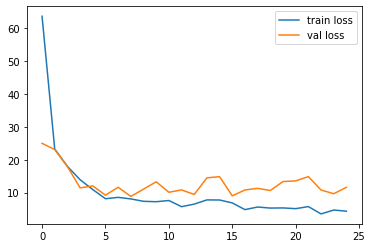

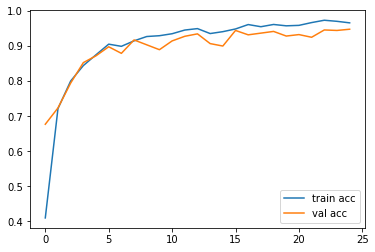

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model.save('pdd_model_inceptionV3.h5')